In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Mistery Function

In [25]:
def f( x, offset=-40, sd =0):
    # print("x",x)
    n = x.shape[0]
    x1 = x[:, 0]
    x2 = x[:, 1]
    term1 = 2
    term2 = 0.01*(x2-x1**2.0)**2.0
    term3 = (1 -  x1 )** 2
    term4 = 2*(2-x2)**2
    term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
    fval = term1 + term2 + term3 +term4 +term5
    if sd == 0:
        noise = np.zeros(n).reshape(n, 1)
    else:
        noise = np.random.normal(0, sd, n).reshape(n, 1)
    # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
    return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

In [50]:

X = np.random.random((10000,2))*5


In [51]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    results_1.append(best_value - data.values)
    
mean_values = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE = 1.95*std_values/np.sqrt(len(files))

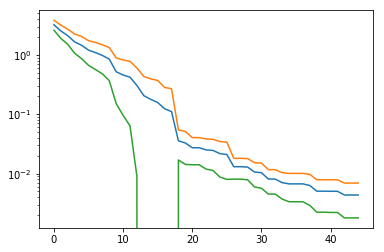

In [52]:
plt.plot(mean_values[:,1])
plt.plot(mean_values[:,1]+MSE[:,1])
plt.plot(mean_values[:,1]-MSE[:,1])
plt.yscale("log")

In [55]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)

best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    results_1.append(best_value - data.values)
    
mean_values = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE = 1.95*std_values/np.sqrt(len(files))

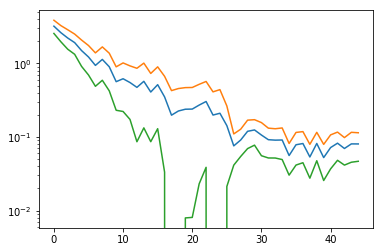

In [56]:
plt.plot(mean_values[:,1])
plt.plot(mean_values[:,1]+MSE[:,1])
plt.plot(mean_values[:,1]-MSE[:,1])
plt.yscale("log")

In [57]:
mean_values[:,1]

array([3.21722418, 2.6268199 , 2.21907466, 1.92229742, 1.4975134 ,
       1.22652413, 0.94219618, 1.13612437, 0.90280503, 0.56600333,
       0.62019652, 0.55078089, 0.47355491, 0.57235705, 0.40936668,
       0.51494377, 0.35119049, 0.19826301, 0.22603833, 0.23887229,
       0.23995966, 0.27198975, 0.30422015, 0.19902338, 0.21055964,
       0.14293413, 0.07584527, 0.09108014, 0.1196452 , 0.12487468,
       0.10644877, 0.09200824, 0.09073952, 0.09114273, 0.05602819,
       0.07853389, 0.08161244, 0.05359396, 0.08176441, 0.0525515 ,
       0.07192152, 0.08248608, 0.06987469, 0.08067729, 0.08055197])